In [5]:
import os
import cv2
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
images=[]
for folders in os.listdir(r'..../classified'):
    for files in os.listdir(r'..../classified/'+folders):
        img=cv2.imread(r'...../classified/'+folders+'/'+files,0)/255
        img=cv2.resize(img,(128,128))
        img.shape=(128,128,1)
        images.append(img)
         labels.append(folders)
images=np.array(images)

In [7]:
classes=2
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(128,128,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(156, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 58, 58, 32)        51232     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 16)       

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
keras.initializers.lecun_uniform(seed=None)

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(images, y_labels, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/50
531/531 [==============================] - 1239s 2s/step - loss: 3.1758 - accuracy: 0.2804 - val_loss: 1.1691 - val_accuracy: 0.6594
Epoch 2/50
531/531 [==============================] - 998s 2s/step - loss: 1.0224 - accuracy: 0.6952 - val_loss: 0.6937 - val_accuracy: 0.7906
Epoch 3/50
531/531 [==============================] - 1008s 2s/step - loss: 0.6858 - accuracy: 0.7878 - val_loss: 0.5632 - val_accuracy: 0.8276
Epoch 4/50
531/531 [==============================] - 1007s 2s/step - loss: 0.5569 - accuracy: 0.8246 - val_loss: 0.4856 - val_accuracy: 0.8489
Epoch 5/50
531/531 [==============================] - 1018s 2s/step - loss: 0.4626 - accuracy: 0.8504 - val_loss: 0.4167 - val_accuracy: 0.8701
Epoch 6/50
531/531 [==============================] - 1021s 2s/step - loss: 0.4126 - accuracy: 0.8660 - val_loss: 0.3802 - val_accuracy: 0.8804
Epoch 7/50
531/531 [==============================] - 1015s 2s/step - loss: 0.3811 - accuracy: 0.8744 - val_loss: 0.3675 - val_accuracy: 

In [9]:
print(images.shape)

(79112, 128, 128, 1)


In [18]:
import glob
import os
import cv2
label=[]
folder=r"...../Labels"
for f in os.listdir(folder):
    file="......./Labels/"+f+"/*.tiff"
    for i in glob.glob(file):
        img = cv2.imread(i,0)
        img2=255-img
        img2=cv2.resize(img2, (128, 128))
        label.append(img2)

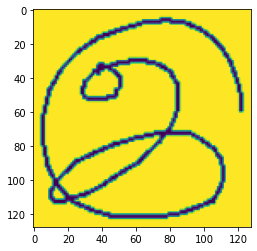

In [11]:
from matplotlib import pyplot as plt
img=images[1254]
img.shape=(128,128)
plt.imshow(img)

Class:  [2]


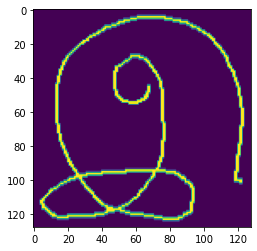

In [21]:
predict_y=model.predict(images[1233:1234])
classes=np.argmax(predict_y,axis=1)
print("Class: ",classes)
from matplotlib import pyplot as plt
img=label[classes[0]]
img.shape=(128,128)
plt.imshow(img)

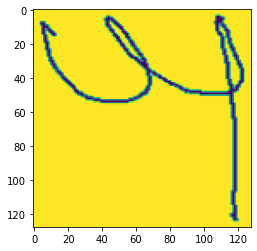

In [15]:
from matplotlib import pyplot as plt
img=images[46733]
img.shape=(128,128)
plt.imshow(img)

Class:  [91]


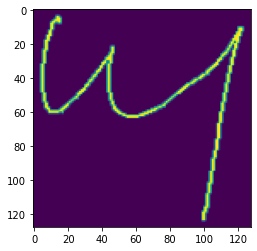

In [22]:
predict_y=model.predict(images[46733:46734])
classes=np.argmax(predict_y,axis=1)
print("Class: ",classes)
from matplotlib import pyplot as plt
img=label[classes[0]]
img.shape=(128,128)
plt.imshow(img)

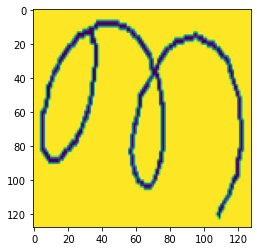

In [17]:
from matplotlib import pyplot as plt
img=images[61963]
img.shape=(128,128)
plt.imshow(img)

Class:  [120]


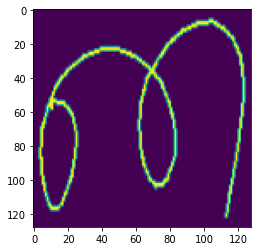

In [23]:
predict_y=model.predict(images[61963:61964])
classes=np.argmax(predict_y,axis=1)
print("Class: ",classes)
from matplotlib import pyplot as plt
img=label[classes[0]]
img.shape=(128,128)
plt.imshow(img)

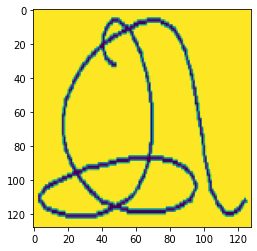

In [24]:
from matplotlib import pyplot as plt
img=images[1563]
img.shape=(128,128)
plt.imshow(img)

Class:  [2]


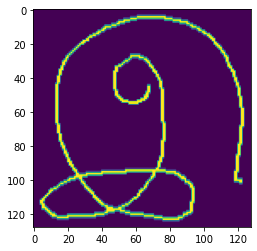

In [26]:
predict_y=model.predict(images[1563:1564])
classes=np.argmax(predict_y,axis=1)
print("Class: ",classes)
from matplotlib import pyplot as plt
img=label[classes[0]]
img.shape=(128,128)
plt.imshow(img)